## **Import Libraries**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Train and Test path**

In [3]:
train_path='/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/train'
test_path='/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/test'

In [4]:
ln=len(os.listdir(train_path))
ln

2

In [5]:
for i in os.listdir(train_path):
  print(i)

surprise
disgust


In [6]:
for i in range(0,len(os.listdir(train_path))):
  print(i)
  print(os.listdir(train_path)[i])

0
surprise
1
disgust


In [7]:
for folder in os.listdir(train_path):
  print(folder)
  print(os.path.join(train_path,folder))
  break

surprise
/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/train/surprise


In [8]:
for folder in os.listdir(train_path):
  print(folder)
  print(os.listdir(os.path.join(train_path,folder)))
  break

surprise
['Training_30137099.jpg', 'Training_31658649.jpg', 'Training_30090222.jpg', 'Training_31353660.jpg', 'Training_30410090.jpg', 'Training_31486684.jpg', 'Training_30213599.jpg', 'Training_31544914.jpg', 'Training_30192163.jpg', 'Training_30638689.jpg', 'Training_30347331.jpg', 'Training_33692198.jpg', 'Training_33197054.jpg', 'Training_33589773.jpg', 'Training_32048247.jpg', 'Training_32053429.jpg', 'Training_33475746.jpg', 'Training_33425770.jpg', 'Training_33638568.jpg', 'Training_32568053.jpg', 'Training_33738120.jpg', 'Training_31832170.jpg', 'Training_32206144.jpg', 'Training_32183003.jpg', 'Training_31933205.jpg', 'Training_33773704.jpg', 'Training_32910003.jpg', 'Training_31893733.jpg', 'Training_32776118.jpg', 'Training_33275062.jpg', 'Training_31865223.jpg', 'Training_33694003.jpg', 'Training_31738923.jpg', 'Training_33739656.jpg', 'Training_31748400.jpg', 'Training_32113295.jpg', 'Training_31736666.jpg', 'Training_33954174.jpg', 'Training_32348983.jpg', 'Training_32562

In [9]:
for folder in os.listdir(train_path):
  print(folder)
  folder_path= os.path.join(train_path,folder)
  for images in os.listdir(os.path.join(train_path,folder)):
    num_images= os.listdir(folder_path)
    print(f"Folder '{folder}' contains {num_images} image files.")
    break

surprise
Folder 'surprise' contains ['Training_30137099.jpg', 'Training_31658649.jpg', 'Training_30090222.jpg', 'Training_31353660.jpg', 'Training_30410090.jpg', 'Training_31486684.jpg', 'Training_30213599.jpg', 'Training_31544914.jpg', 'Training_30192163.jpg', 'Training_30638689.jpg', 'Training_30347331.jpg', 'Training_33692198.jpg', 'Training_33197054.jpg', 'Training_33589773.jpg', 'Training_32048247.jpg', 'Training_32053429.jpg', 'Training_33475746.jpg', 'Training_33425770.jpg', 'Training_33638568.jpg', 'Training_32568053.jpg', 'Training_33738120.jpg', 'Training_31832170.jpg', 'Training_32206144.jpg', 'Training_32183003.jpg', 'Training_31933205.jpg', 'Training_33773704.jpg', 'Training_32910003.jpg', 'Training_31893733.jpg', 'Training_32776118.jpg', 'Training_33275062.jpg', 'Training_31865223.jpg', 'Training_33694003.jpg', 'Training_31738923.jpg', 'Training_33739656.jpg', 'Training_31748400.jpg', 'Training_32113295.jpg', 'Training_31736666.jpg', 'Training_33954174.jpg', 'Training_323

In [10]:
for folder in os.listdir(train_path):
  print(folder)
  folder_path= os.path.join(train_path,folder)
  for images in os.listdir(os.path.join(train_path,folder)):
    num_images = sum(1 for file in os.listdir(folder_path))
    print(f"Folder '{folder}' contains {num_images} image files.")
    break

surprise
Folder 'surprise' contains 1160 image files.
disgust
Folder 'disgust' contains 436 image files.


In [11]:
for folder in os.listdir(train_path):
  print(folder)
  folder_path= os.path.join(train_path,folder)
  for images in os.listdir(os.path.join(train_path,folder)):
    num_images = sum(1 for file in os.listdir(folder_path)
                     if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")))
    print(f"Folder '{folder}' contains {num_images} image files.")
    break

surprise
Folder 'surprise' contains 1160 image files.
disgust
Folder 'disgust' contains 436 image files.


In [14]:
#print total number of images in single file
import os
# Set the root directory
root_dir = "/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/train/disgust"

# Loop through all subdirectories
for subdir, dirs, files in os.walk(root_dir):
    # Count the number of image files in the directory
    num_images = sum(1 for file in files if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")))
    
    # Print the results
    print(f"Folder '{subdir}' contains {num_images} image files.")


Folder '/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/train/disgust' contains 436 image files.


In [15]:
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    num_images = len(os.listdir(folder_path))
    print(f"Folder '{folder}' contains {num_images} image files.")

Folder 'surprise' contains 1160 image files.
Folder 'disgust' contains 436 image files.


In [16]:
import glob
train_data = glob.glob(train_path + '/*/*.jpg')
# Print the number of images in the list
print(len(train_data))

1596


In [17]:
for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    num_images = len(os.listdir(folder_path))
    print(f"Folder '{folder}' contains {num_images} image files.")

Folder 'disgust' contains 51 image files.
Folder 'surprise' contains 170 image files.


NotADirectoryError: ignored

# Load data for Train

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the target image size
target_size = (224, 224)

# Create empty arrays to hold the images and labels
X_train = []
y_train = []


In [19]:
# Loop over each image path and load the image
for path in train_data:
    # Load the image and resize it to the target size
    img = load_img(path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Normalize the pixel values
    img_array /= 255.0
    
    # Add the image array to the X_train array
    X_train.append(img_array)

    # Extract the label from the path and add it to the y_train array
    label = path.split('/')[-2]
    y_train.append(label)

# Convert the X_train and y_train arrays to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
# Get the list of all the labels in your dataset
labels = []
for path in train_data:
    label = path.split('/')[-2]
    labels.append(label)

# Find the number of unique labels, which equals the number of classes
num_classes = len(set(labels))

print("Number of classes:", num_classes)

Number of classes: 2


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Print the encoded labels
print(y_train)

[1 1 1 ... 0 0 0]


In [22]:
# Convert the y_train labels to one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## **Load data for validation**

In [23]:
val_data = glob.glob(test_path + '/*/*.jpg')
# Print the number of images in the list
print(len(val_data))

221


In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the target image size
target_size = (224, 224)

# Create empty arrays to hold the images and labels
X_val= []
y_val = []


In [25]:
# Loop over each image path and load the image
for path in val_data:
    # Load the image and resize it to the target size
    img = load_img(path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Normalize the pixel values
    img_array /= 255.0
    
    # Add the image array to the X_train array
    X_val.append(img_array)

    # Extract the label from the path and add it to the y_train array
    label = path.split('/')[-2]
    y_val.append(label)

# Convert the X_train and y_train arrays to numpy arrays
X_val = np.array(X_val)
y_val = np.array(y_val)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels as integers
le = LabelEncoder()
y_val = le.fit_transform(y_val)

# Print the encoded labels
print(y_val)
# Convert the y_train labels to one-hot encoding
from keras.utils import to_categorical
y_val = to_categorical(y_val)
print(y_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [

## **Define Model**

In [27]:
from keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
input_shape = (224, 224, 3)
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))# Output layer with two neurons and softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Classification Report**

In [39]:
from sklearn.metrics import classification_report

# Use the model to make predictions on the test data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_classes)

# Print the classification report
print(report)

7/7 [==============================] - 7s 930ms/step
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        51
           1       0.92      0.92      0.92       170

    accuracy                           0.87       221
   macro avg       0.82      0.82      0.82       221
weighted avg       0.87      0.87      0.87       221



## **Train Model**

In [29]:
# Fit the model to the training data
history=model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
50/50 [==============================] - 228s 5s/step - loss: 0.4532 - accuracy: 0.7769 - val_loss: 0.4212 - val_accuracy: 0.8100
Epoch 2/10
50/50 [==============================] - 240s 5s/step - loss: 0.3523 - accuracy: 0.8465 - val_loss: 0.4265 - val_accuracy: 0.8100
Epoch 3/10
50/50 [==============================] - 209s 4s/step - loss: 0.2649 - accuracy: 0.8960 - val_loss: 0.3716 - val_accuracy: 0.8643
Epoch 4/10
50/50 [==============================] - 210s 4s/step - loss: 0.1804 - accuracy: 0.9261 - val_loss: 0.3862 - val_accuracy: 0.8416
Epoch 5/10
50/50 [==============================] - 209s 4s/step - loss: 0.1416 - accuracy: 0.9436 - val_loss: 0.3952 - val_accuracy: 0.8597
Epoch 6/10
50/50 [==============================] - 209s 4s/step - loss: 0.0689 - accuracy: 0.9724 - val_loss: 0.5026 - val_accuracy: 0.8643
Epoch 7/10
50/50 [==============================] - 207s 4s/step - loss: 0.0284 - accuracy: 0.9900 - val_loss: 0.6483 - val_accuracy: 0.8733
Epoch 8/10
50

## **Save and check Accuracy by prediction variable**

In [30]:
# Save the trained model
model.save('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/my_model.h5')

In [31]:
# Load the trained model from file
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/my_model.h5')

# Use the model to make predictions on the test data
y_pred = model.predict(X_val)

# Evaluate the model's performance on the test data
score = model.evaluate(X_val, y_val)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


7/7 [==============================] - 9s 1s/step - loss: 0.6449 - accuracy: 0.8733
Test loss: 0.644862949848175
Test accuracy: 0.8733031749725342


## **Accuracy and Loss plot**

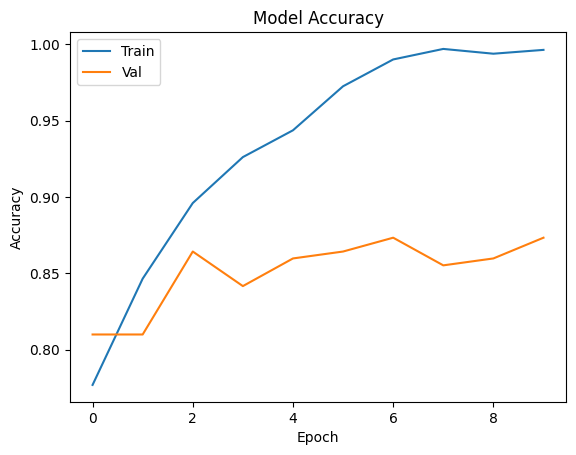

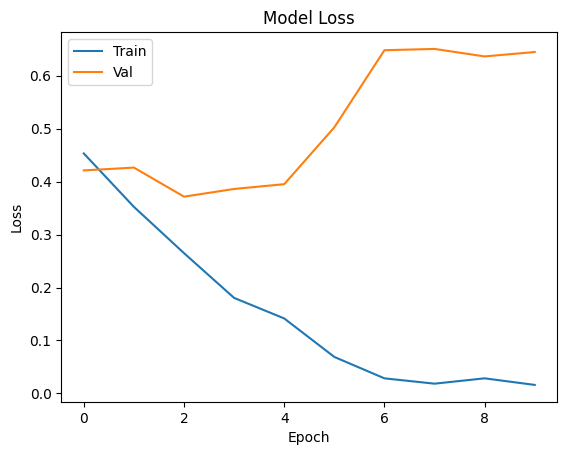

In [32]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## **Confusion Matrix**

7/7 [==============================] - 11s 1s/step


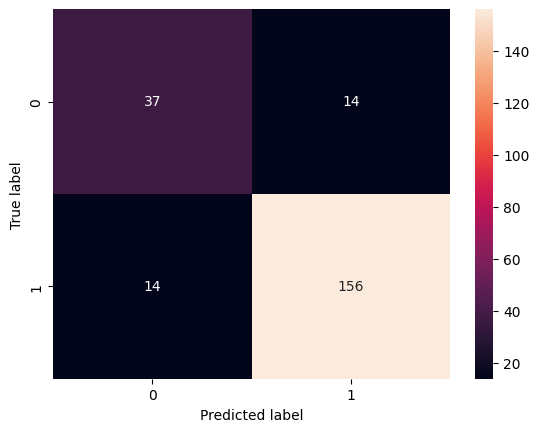

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use the model to make predictions on the test data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **use the model for prediction**

1/1 [==============================] - 0s 130ms/step


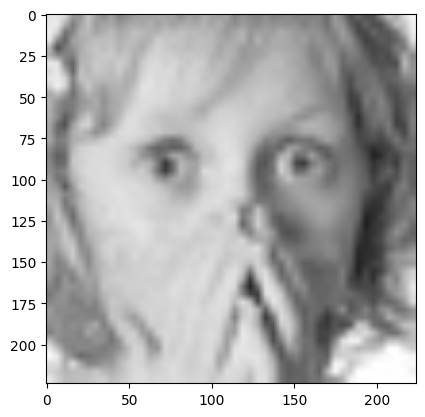

Predicted emotion:  surprise


In [34]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Define the class labels
class_labels = ['disgust','surprise']

# Load the trained model from file
model = load_model('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/my_model.h5')

# Load and preprocess the image
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/test/surprise/b.jpg')
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0

# Make a prediction on the image
pred = model.predict(np.expand_dims(img, axis=0))

# Get the predicted class index and label
class_idx = np.argmax(pred)
class_label = class_labels[class_idx]

#display predicted image
# Display the image
plt.imshow(img)
plt.show()

# Print the predicted label
print("Predicted emotion: ", class_label)


In [35]:
from PIL import Image, ImageDraw, ImageFont

# Load the image
image = Image.open('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/test/surprise/b.jpg')
# Get the current size of the image
current_size = image.size

# Define the new size for the image (twice the size of the original)
new_size = (current_size[0] * 3, current_size[1] * 3)

# Resize the image
image = image.resize(new_size)

# Define the font and size
font = ImageFont.truetype('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/arial.ttf', 24)

# Define the text to write
text = class_label

# Create a drawing object
draw = ImageDraw.Draw(image)

# Get the size of the text
text_size = draw.textsize(text, font)

# Calculate the x and y positions for the text
x = (image.width - text_size[0]) / 2
y = (image.height - text_size[1]) / 2

# Write the text on the image
draw.text((x, y), text, font=font, fill=255)

# Save the image
image.save('/content/drive/My Drive/Colab Notebooks/CNN/predicted_img.jpg')

In [36]:
# Save the predicted image with the predicted class name as the filename
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/' + class_label + '.jpg', img)

True

In [37]:
predicted_image = cv2.imread('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/test/surprise/b.jpg')
# Convert the image to the appropriate color space (if needed)
predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

# Convert the image array to the appropriate data type (if needed)
predicted_image = predicted_image.astype(np.uint8)

# Save the predicted image to a specified location
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/predicted_image.jpg', predicted_image)

True

1/1 [==============================] - 0s 137ms/step


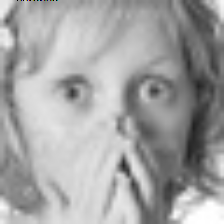

In [38]:
from google.colab.patches import cv2_imshow

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model from file
model = load_model('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/my_model.h5')

# Load the image and preprocess it
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/CNN/Human_emotion_detection_using_classification/dataset_emotion/test/surprise/b.jpg')
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

# Predict the class label of the image
pred = model.predict(img)[0]
class_idx = np.argmax(pred)
class_label = ['disgust', 'surprise'][class_idx]

# Write the predicted class label on the image
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (0, 0, 255)
thickness = 2

# Get the size of the text to be written
text_size, _ = cv2.getTextSize(class_label, font, fontScale, thickness)

# Calculate the position of the text on the image
x = int((img.shape[1] - text_size[0]) / 2)
y = int((img.shape[0] + text_size[1]) / 2)

# Write the text on the image
cv2.putText(img, class_label, (x, y), font, fontScale, color, thickness)

#reshape image
img = img.reshape((224, 224, 3))

from PIL import Image
# Convert the image to the PIL Image format
img = Image.fromarray((img * 255).astype('uint8'))

# Display the image using PIL
img.show()
